<h2>Kolminkertainen eksponentiaalinen tasoitus</h2>

Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi.

Holt-Winterin malli huomioi sekä trendin että kausivaihtelun.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Mallin hyvyyttä kuvaava statistiikka löytyy <b>sklearn.metrics</b>-kirjastosta.

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-3/

<h3>Aikasarjaan tutustuminen</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Tiedoston avaaminen
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450
5,2015-03-31,350
6,2015-06-30,200
7,2015-09-30,300
8,2015-12-31,350
9,2016-03-31,200


In [3]:
# Aikaleimat indeksiin
# to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
# format mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format = "%Y-%m-%d")

# Pudotetaan tarpeettomaksi käynyt sarake pois
df = df.drop('Vuosineljännes', axis = 1)
df

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450
2015-03-31,350
2015-06-30,200
2015-09-30,300
2015-12-31,350


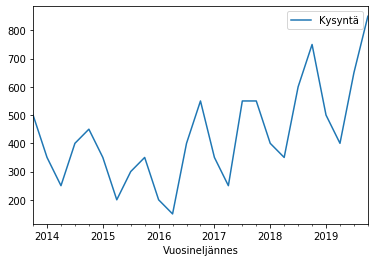

In [4]:
# Aikasarja viivakaaviona
df.plot()

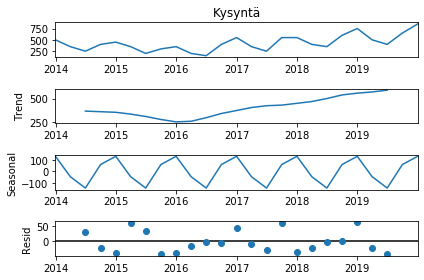

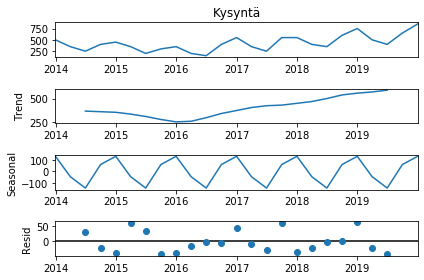

In [5]:
# Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
# Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
# Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu
# Jos kaaviot tulostuvat kahteen kertaan, niin siitä ei kannata huolestua

from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(df['Kysyntä']).plot()

<h3>Mallin sovitus</h3>

Ennustemalli sovitetaan (<b>fit()</b>) dataan.
Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi <b>malli</b>), joka sisältää monenlaista tietoa mallista.

Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [6]:
from statsmodels.tsa.api import ExponentialSmoothing

# Trendi ja kausivaihtelu huomioidaan
# Kausivaihtelu huomoidaan tulomallina (mul), mutta myös summamalli olisi mahdollinen (add)
# seasonal_periods = kuinka monen periodin jaksoissa kausivaihtelu esiintyy?
# freq='Q': aikaleimat vuosineljänneksen viimeisiä päiviä
malli = ExponentialSmoothing(df['Kysyntä'], trend = 'add', seasonal = 'mul', 
                             seasonal_periods = 4, freq='Q').fit()

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,500.342943
2014-03-31,350,343.399570
2014-06-30,250,264.996683
2014-09-30,400,447.003743
2014-12-31,450,497.038058
2015-03-31,350,314.156346
2015-06-30,200,262.197606
2015-09-30,300,371.504841
2015-12-31,350,382.323669


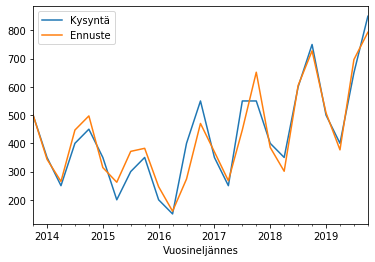

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,500.342943,-0.342943
2014-03-31,350,343.399570,6.600430
2014-06-30,250,264.996683,-14.996683
2014-09-30,400,447.003743,-47.003743
2014-12-31,450,497.038058,-47.038058
2015-03-31,350,314.156346,35.843654
2015-06-30,200,262.197606,-62.197606
2015-09-30,300,371.504841,-71.504841
2015-12-31,350,382.323669,-32.323669


<h3>Mallin hyvyys</h3>

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
<ul><li>ennustevirheiden neliöiden keskiarvoa (MSE = mean squared error)</li>
    <li>ennustevirheiden itseisarvojen keskiarvoa (MAD = mean absolute deviation)</li>
    <li>ennustevirheiden aikasarjaa viivakaaviona</li>
    <li>ennusteiden ja toteutuneiden arvojen hajontakaaviota</li></ul>

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mean squared error', mean_squared_error(df['Kysyntä'], df['Ennuste']))
print('mean absolute error', mean_absolute_error(df['Kysyntä'], df['Ennuste']))

mean squared error 2848.6320923500507
mean absolute error 41.853462020342796


Text(0, 0.5, 'Ennustevirhe')

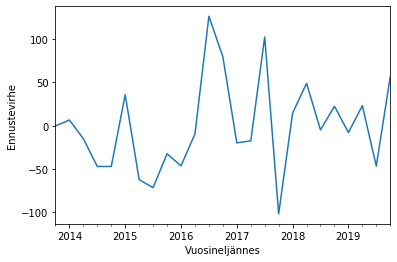

In [11]:
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

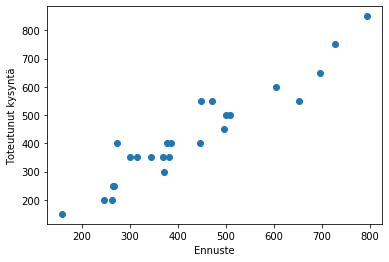

In [12]:
# Ennusteiden ja toteutuneiden kysytöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Kysyntä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

<h3>Ennusteiden laskeminen</h3>

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
<ul><li>ensimmäisen ennustettavan ajankohdan aikaleima</li>
    <li>ennustettavien ajankohtien lukumäärä (periods)</li>
    <li>ennustettavien ajankohtien frekvenssi (freq)</li></ul>
        
Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [13]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä ensimmäisen ennusteen aikaleima)
index = pd.date_range('2020-03-31', periods = 4, freq = 'Q')

# Ennusteet neljälle vuosineljännekselle
ennusteet = malli.forecast(4)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-03-31,571.427756
2020-06-30,428.758758
2020-09-30,751.306153
2020-12-31,906.051259


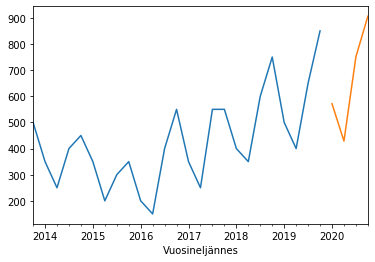

In [14]:
# Viivakaavio havainnoista
df['Kysyntä'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [15]:
# Ennusteet dataframeen alkuperäisen aikasarjan perään
df = pd.concat([df, df_ennuste])
df

,Kysyntä,Ennuste,Ennustevirhe
2013-12-31,500.0,500.342943,-0.342943
2014-03-31,350.0,343.399570,6.600430
2014-06-30,250.0,264.996683,-14.996683
2014-09-30,400.0,447.003743,-47.003743
2014-12-31,450.0,497.038058,-47.038058
2015-03-31,350.0,314.156346,35.843654
2015-06-30,200.0,262.197606,-62.197606
2015-09-30,300.0,371.504841,-71.504841
2015-12-31,350.0,382.323669,-32.323669
2016-03-31,200.0,246.320936,-46.320936


<h3>Mallin statistiikkaa</h3>

malli-oliosta löytyy monenlaista statistiikkaa. Mallin parametrit on laskettu siten että mean squared error saadaan mahdollisimman pieneksi.

In [16]:
malli.params

{'smoothing_level': 0.8700767334936588,
 'smoothing_slope': 1.1008614433032791e-21,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 571.4279827113896,
 'initial_slope': 18.70354865082524,
 'initial_seasons': array([0.84784987, 0.56435346, 0.4157706 , 0.71556898]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}